# JupyterLab Support (Python 3.5+)
- For use in JupyterLab, install the jupyterlab and ipywidgets packages using pip...

```Python
$ pip install jupyterlab==1.2 "ipywidgets>=7.5"
```

- Then run the following commands to install the required JupyterLab extensions (note that this will require node to be installed):
- set NODE_OPTIONS=--max-old-space-size=4096

## Jupyter widgets extension
- jupyter labextension install @jupyter-widgets/jupyterlab-manager@1.1 --no-build

## jupyterlab renderer support
- jupyter labextension install jupyterlab-plotly@4.6.0 --no-build

## FigureWidget support
- jupyter labextension install plotlywidget@4.6.0 --no-build

## Build extensions (must be done to activate extensions since --no-build is used above)
- jupyter lab build

```Python
$ jupyter lab
```

In [1]:
# pip install <'plotly', 'cufflinks', 'folium', 'nodejs', in terminal -> @jupyterlab/plotly-extension',  >


%matplotlib inline 
# 'Magic function'
# Команда %matplotlib inline указывает, что график необходимо построить все в той же оболочке Jupyter, 
# но теперь он выводится как обычная картинка. 
# Данный способ удобен тем, что позволяет проводить очень много экспериментов в рамках одного окна (точнее web-страницы). 
# В этом статическом режиме, никакие изменения не отобразятся до тех пор пока не будет выполнена команда plt.show()

# Кстати, магические команды, так же как и команды импорта библиотек, 
# распространяются на весь блокнот (и все его ячейки), поэтому, команды: %matplotlib, %matplotlib notebook и %matplotlib inline 
# достаточно указывать один раз в самой первой ячейке.

import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style # gallery of stylesheets defined in Matplotlib
                             #style.use('ggplot')

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=(10,7)


import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium 

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_excel(r"./data_for_projects/COVID-19-Time-Series-Forecasting-with-Data-Analysis-master/Covid cases in India.xlsx")

df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [4]:
df.drop(['S. No.'], axis = 1, inplace=True)

In [5]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0


In [6]:
df['Total Cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [7]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [8]:
print(f"The total number of cases till now in India is {df['Total Cases'].sum()}")

The total number of cases till now in India is 729


In [9]:
df.head().style.background_gradient(cmap='Blues') # Gradient in column highcharts

df['Active Cases'] = df['Total Cases'] - (df['Cured'] + df['Death'])

In [10]:
Total_Active_Cases= df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()

In [11]:
Total_Active_Cases

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [12]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [13]:
# Graphical Representation

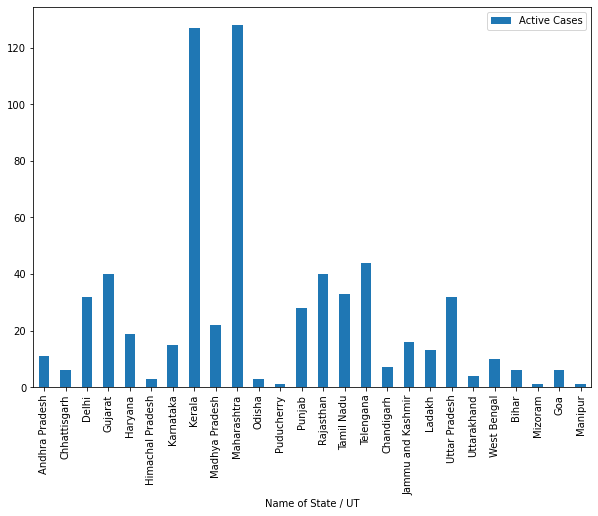

In [14]:
# Pandas visualization
df.plot(kind='bar', x='Name of State / UT', y='Active Cases')

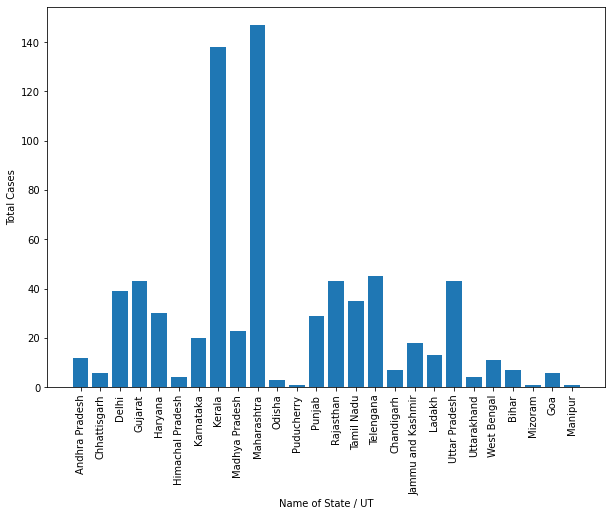

In [15]:
# Matplotlib visualization
plt.bar(df['Name of State / UT'], df['Total Cases'])
plt.xlabel('Name of State / UT')
plt.ylabel('Total Cases')
plt.xticks(df['Name of State / UT'], rotation='vertical', size=10)
plt.show()

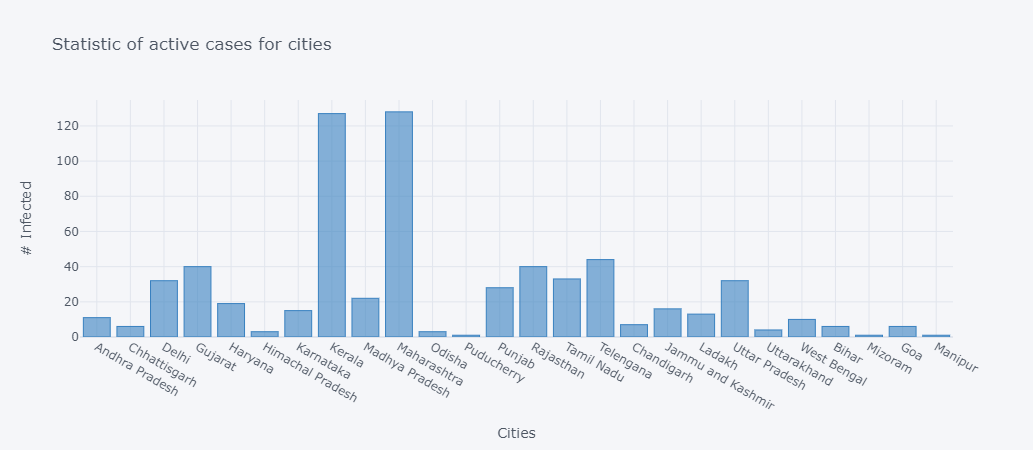

In [16]:
# Plotly visualization
df.iplot(asFigure=True, 
         kind='bar', 
         title='Statistic of active cases for cities',
         xTitle='Cities', 
         yTitle='# Infected', 
         x='Name of State / UT', 
         y='Active Cases',
         color='Blue'
        )

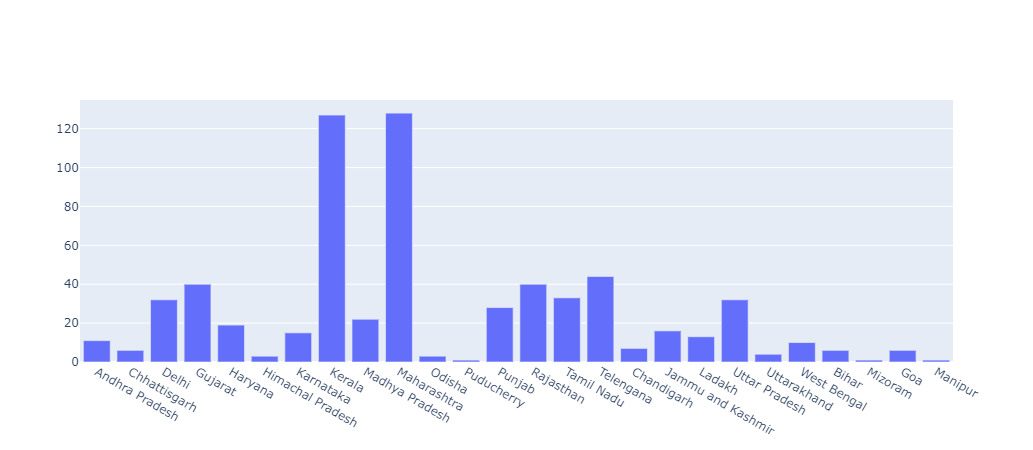

In [17]:
#simple plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'], y=df['Active Cases']))

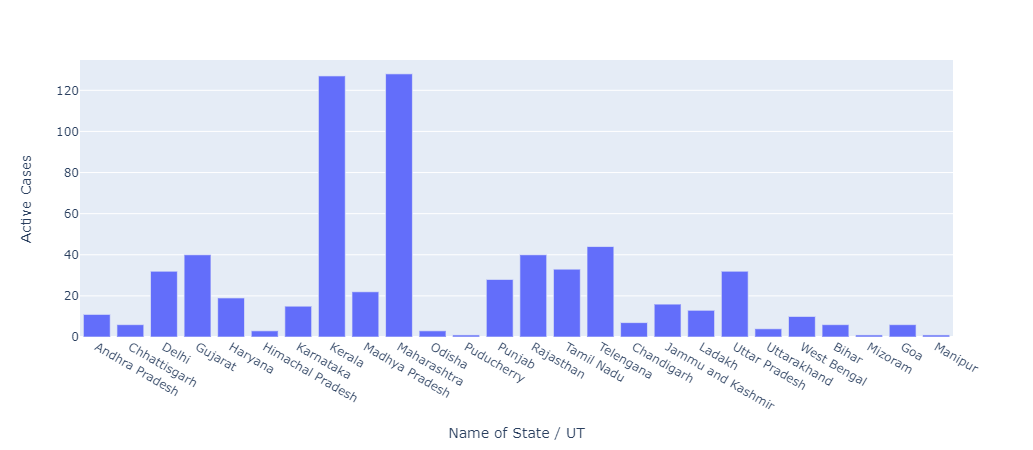

In [18]:
px.bar(df, x='Name of State / UT', y='Active Cases')

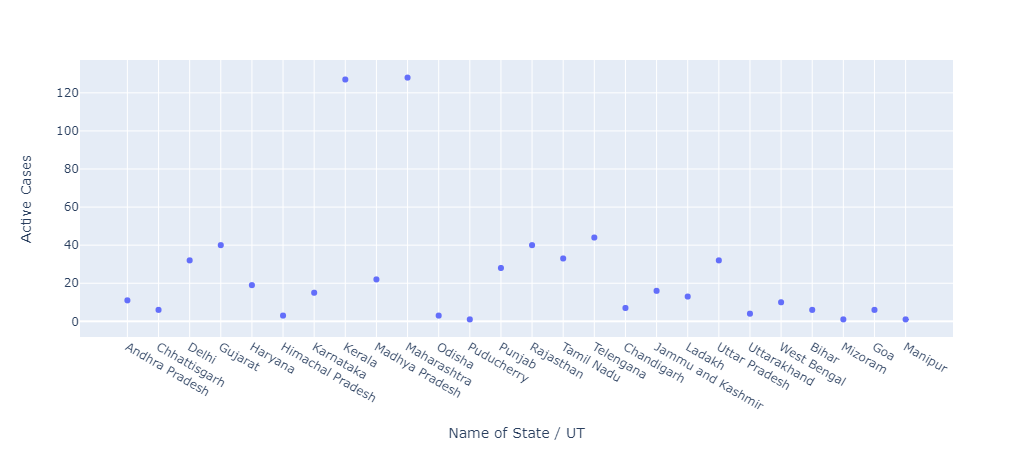

In [19]:
px.scatter(df, x='Name of State / UT', y='Active Cases')

In [20]:
indian_Cord = pd.read_excel(r"./data_for_projects/COVID-19-Time-Series-Forecasting-with-Data-Analysis-master/Indian Coordinates.xlsx")

indian_Cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [21]:
df_full = pd.merge(indian_Cord, df, on="Name of State / UT")

df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [22]:
map = folium.Map(location=[20,70], zoom_start=3.5, tiles='cartodbdark_matter')

for lat, long, value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Active Cases'], df_full['Name of State / UT']):

    folium.CircleMarker([lat,long], 
                        radius=value*0.5,
                        popup=(f"<strong>State</strong>: {str(name).capitalize()} <br> <strong>Total_Cases</strong>: {str(value)}"), 
                        color='red', 
                        fill_color='green', 
                        fill_opacity=0.2,
                        line_opacity=0.2).add_to(map)

In [23]:
map

In [24]:
#folium.TileLayer('openstreetmap').add_to(m)
#folium.TileLayer('stamentoner').add_to(m)
#folium.TileLayer('stamenTerrain').add_to(m)
#folium.TileLayer('stamenwatercolor').add_to(m)
#folium.TileLayer('cartodbpositron').add_to(m)
#folium.TileLayer('cartodbdark_matter').add_to(m)

In [25]:
# How corona virus is rising Globaly

In [81]:
path = (r"./data_for_projects/COVID-19-Time-Series-Forecasting-with-Data-Analysis-master/per_day_cases.xlsx")

dbd_India = pd.read_excel(path, parse_dates=True,sheet_name='India')
dbd_Italy = pd.read_excel(path, parse_dates=True,sheet_name='Italy')
dbd_Korea = pd.read_excel(path, parse_dates=True,sheet_name='Korea')
dbd_Wuhan = pd.read_excel(path, parse_dates=True,sheet_name='Wuhan')


In [82]:
dbd_India.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


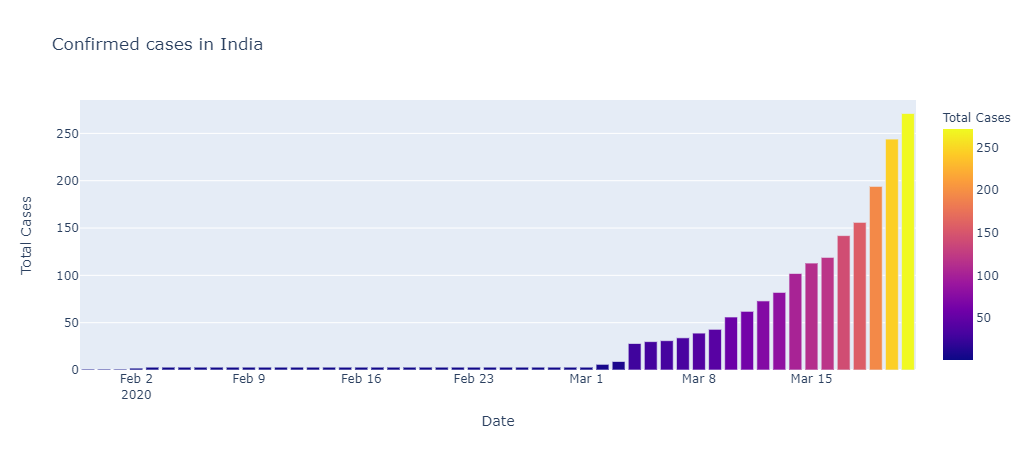

In [76]:
fig = px.bar(dbd_India, x='Date', y='Total Cases', color='Total Cases', title='Confirmed cases in India')
fig.show()

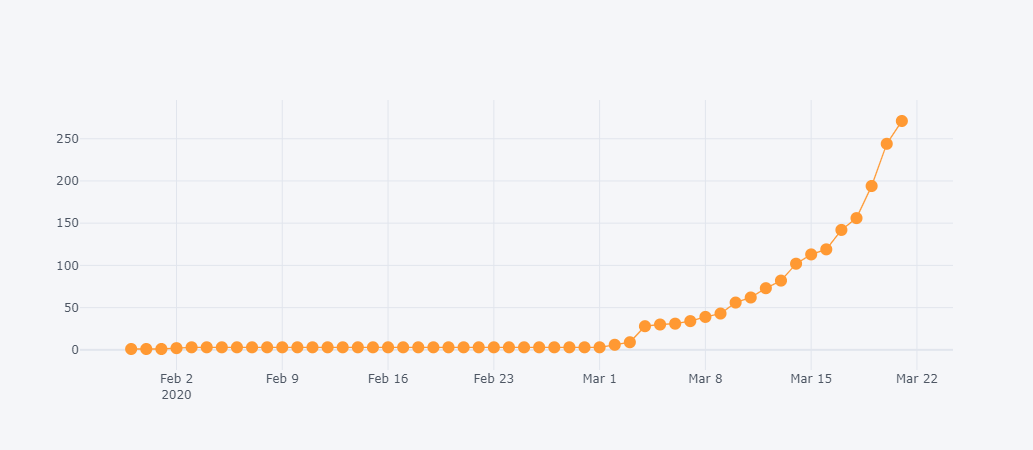

In [77]:
dbd_India.iplot(kind='scatter', x='Date', y='Total Cases', mode='lines+markers')

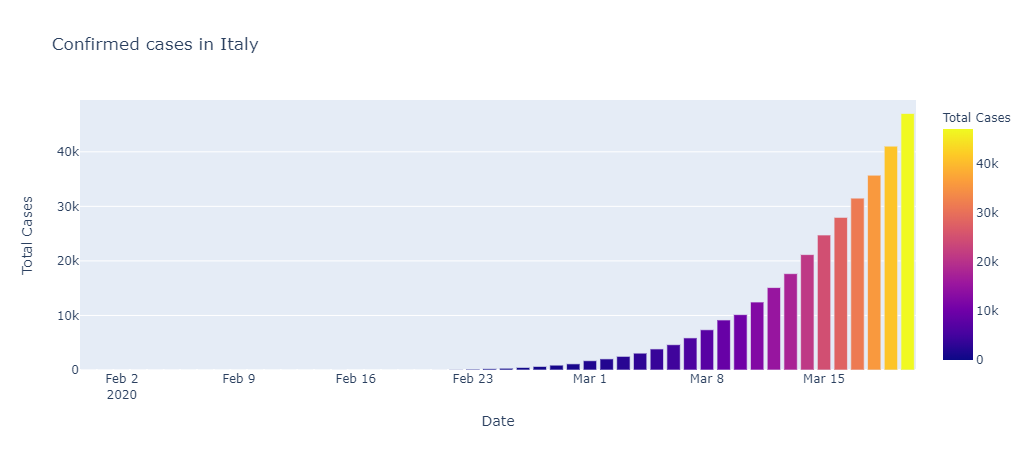

In [78]:
fig = px.bar(dbd_Italy, x='Date', y='Total Cases', color='Total Cases', title='Confirmed cases in Italy')
fig.show()

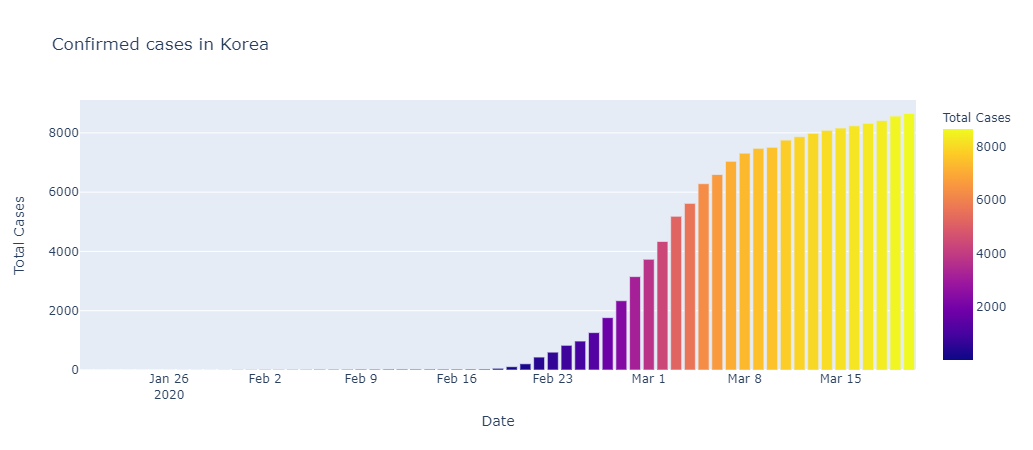

In [79]:
fig = px.bar(dbd_Korea, x='Date', y='Total Cases', color='Total Cases', title='Confirmed cases in Korea')
fig.show()

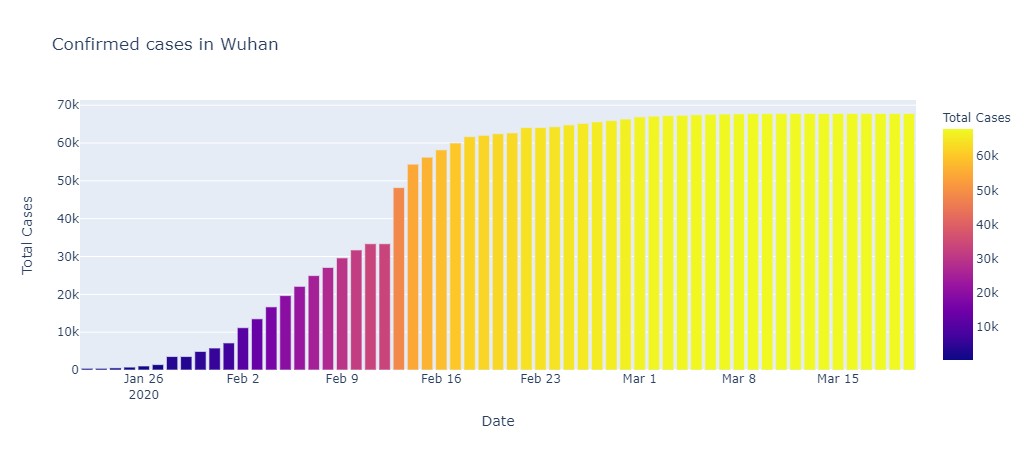

In [83]:
fig = px.bar(dbd_Wuhan, x='Date', y='Total Cases', color='Total Cases', title='Confirmed cases in Wuhan')
fig.show()

In [35]:
from plotly.subplots import make_subplots

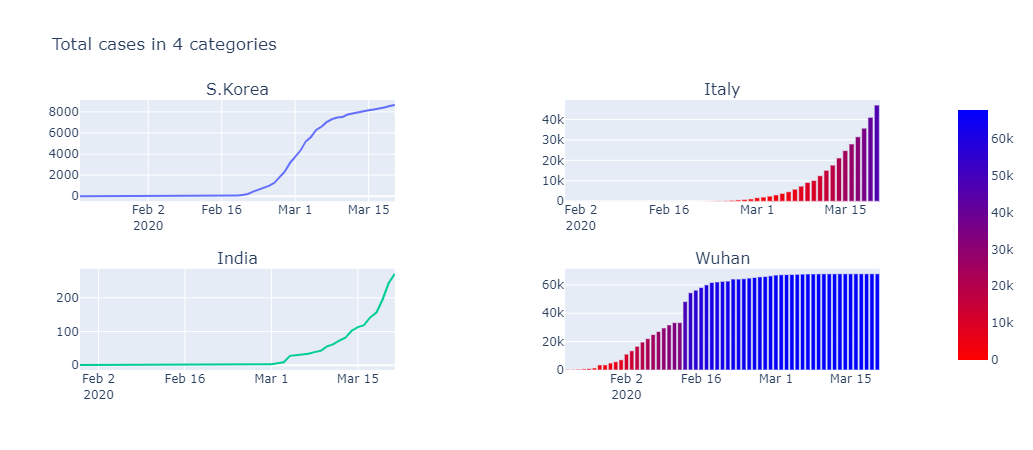

In [84]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'secondary_y':True}, {'secondary_y':True}], [{'secondary_y':True}, {'secondary_y':True}]],
    subplot_titles=('S.Korea', 'Italy','India','Wuhan'))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis='coloraxis')), 1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis='coloraxis')), 1, 2)

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis='coloraxis')), 2, 1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis='coloraxis')), 2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, title_text='Total cases in 4 categories')

In [ ]:
# World

In [120]:
df = pd.read_csv(r"./data_for_projects/COVID-19-Time-Series-Forecasting-with-Data-Analysis-master/covid_19_data.csv", 
                 parse_dates=['Last Update'])

In [121]:
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace = True)


In [122]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [123]:
df.query('Country=="India"').head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


In [124]:
df.groupby('Date').sum().head()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


In [125]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
death = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

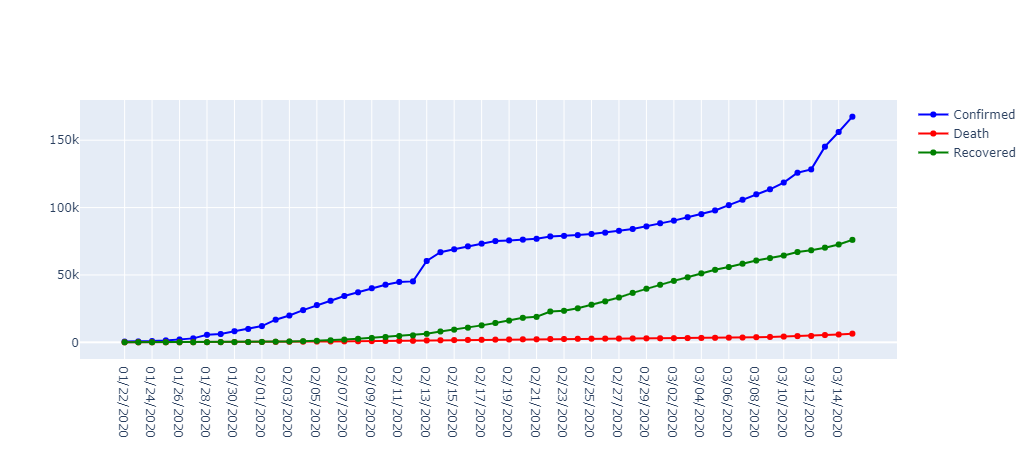

In [126]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed', line=dict(color='blue', width=2)))

fig.add_trace(go.Scatter(x=death['Date'], y=death['Deaths'], mode='lines+markers', name='Death', line=dict(color='red', width=2)))

fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='green', width=2)))

In [127]:
df_confirmed = pd.read_csv(r"./data_for_projects/COVID-19-Time-Series-Forecasting-with-Data-Analysis-master/time_series_covid_19_confirmed.csv")

In [128]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [129]:
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)

In [130]:
df_latlong = pd.merge(df, df_confirmed, on=['Country', 'Province/State'])

In [132]:
df_latlong.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572


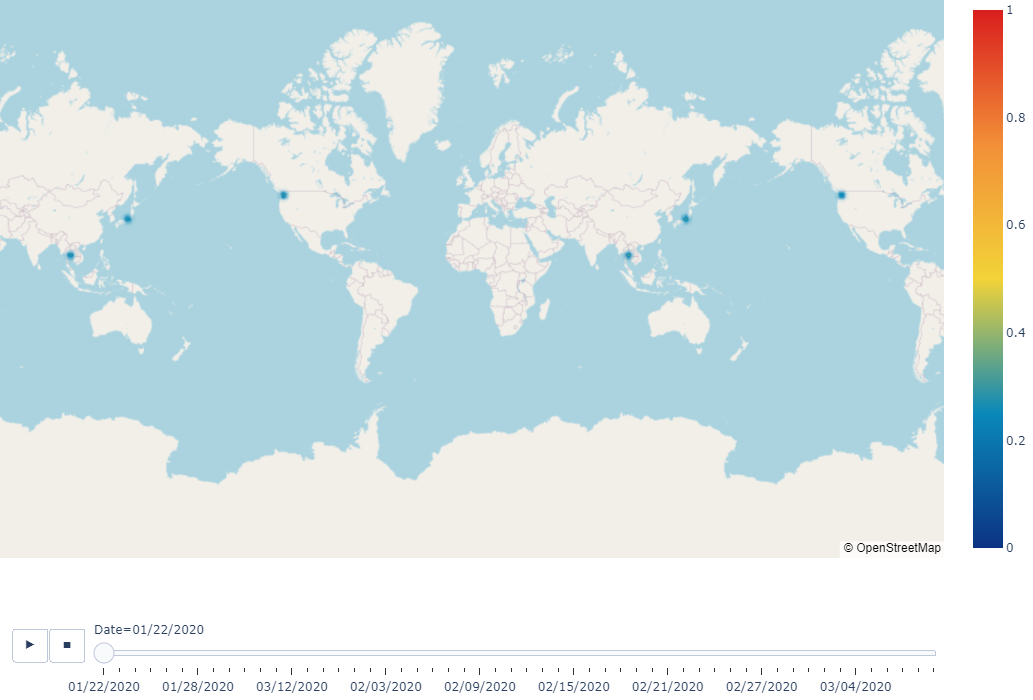

In [135]:
fig = px.density_mapbox(df_latlong, lat='Lat', lon='Long', hover_name="Province/State", hover_data=["Confirmed", "Deaths", "Recovered"], animation_frame="Date", color_continuous_scale="Portland", radius=7, zoom=0, height=700)

fig.update_layout(title='Worldwide Corona virus cases')
fig.update_layout(mapbox_style='open-street-map', mapbox_center_lon=0)
fig.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})